In [ ]:
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
n = [434,382,394,88]
clicks = [8,17,10,4]

In [ ]:
img = [0,0,1,1]
btn = [0,1,0,1]

with pm.Model() as model_comb:
  alpha = pm.Normal('alpha', mu = 0, sigma=10)
  beta = pm.Normal('beta', mu = 0, sigma=10, shape=2)
  comb = alpha + beta[0] * img + beta[1] *btn
  theta = pm.Deterministic('theta', 1/(1 + pm.math.exp(-comb)))
  obs = pm.Binomial('obs', p=theta, n=n, observed=clicks)
  trace_comb = pm.sample(5000,chains=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # Remove the CWD from sys.path while we load stuff.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 12 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


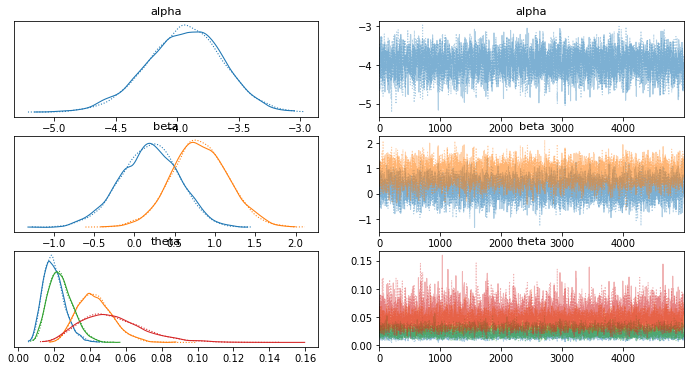

In [ ]:
with model_comb:
  pm.traceplot(trace_comb)

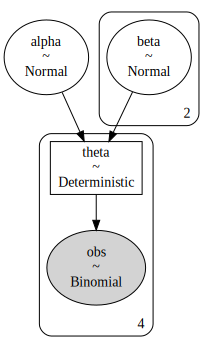

In [ ]:
pm.model_to_graphviz(model_comb)